# **Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import sys

In [2]:
print("Python: ", sys.version)

Python:  3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


In [3]:
inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

layer_output = []

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for neuron_input, weight in zip(inputs, neuron_weights):
        neuron_output += neuron_input*weight
    neuron_output += neuron_bias
    layer_output.append(neuron_output)

print(layer_output)

[4.8, 1.21, 2.385]


In [4]:
import numpy as np

inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

#1st elem we pass is how the element is gonna be indexed
output = np.dot(weights, inputs) + biases
print(output)

[4.8   1.21  2.385]


# **Batches etc**

In [5]:
import numpy as np

#batches allow us to paralellize operations
#batches also help us in generalization

inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]] #3x4

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]] #3x4

biases = [2, 3, 0.5]

#Layer 2
weights2 = [[0.1, -0.14, 0.5],
           [-0.5, 0.12, 0.33],
           [-0.44, 0.73, -0.13]] #3x4

biases2 = [-1, 2, -0.5]

#output = np.dot(weights, inputs) + biases
#gives issue, we need to change shape by transposition

#Layers
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases

layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)

[[ 0.5031   0.53225 -2.03875]
 [ 0.2434  -2.6012  -5.7633 ]
 [-0.99314  1.4297  -0.35655]]


In [6]:
import numpy as np
#same code as above but better
np.random.seed(0)

X = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer1 = Layer_Dense(4,5)#4 = Features, 5 = No. of Neurons
layer2 = Layer_Dense(5,2) # L1 has 5 op so l2 shld have 5 ip

print("Layer 1")
layer1.forward(X)
print(layer1.output)
print("\n")
print("Layer 2")
layer2.forward(layer1.output)
print(layer2.output)

Layer 1
[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]


Layer 2
[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


# **Activation Functions**

#### ReLU Function

In [42]:
X = [[1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]]

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

# ReLU Output
for i in inputs:
    '''
    do the same thing as uncommented code below but better !!! LMAOOOOOO
    if(i>0):
        output.append(i)
    else:
        output.append(0)
    '''
    output.append(max(0, i))

print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


#### Softmax Function

In [17]:
# ReLU Activatio function too inaccurate for backprop
# Since it clips all negative values to 0
# So a network has no idea on how "Wrong" or "Right" an output is 

# Softmax :
# 
# y = exp(x)
# e ~ 2.7182

# Steps:
# imput -> exponentiation -> normalization -> output
#          |______________________________|
#                         |
#                      Softmax

# Example:
#                                                  exp(1)                    exp(2)                    exp(3)
# [1,2,3] -> [exp(1), exp(2), exp(3)] -> [------------------------, ------------------------, ------------------------ ] -> [0.09, 0.24, 0.67]
#                                         exp(1) + exp(2) + exp(3)  exp(1) + exp(2) + exp(3)  exp(1) + exp(2) + exp(3)

# Therefore sofmatx is:
#          exp(z(i,j))
# S(i,j) = -------------
#          ∑ exp(z(i,j))
#          (l=1 -> L)

import math

In [10]:
layer_output = [4.8, 1.21, 2.385]

# 1. Exponentiation
E = math.e # ~ 2.7182

exp_values = []

for output in layer_output:
    exp_values.append(E**output)

print(exp_values)

[121.51041751873483, 3.353484652549023, 10.859062664920513]


In [13]:
# 2. Normalization

# Here :
#                      (Single neuron Value)
# (normalized value) = --------------------------
#                      (sum of all neuron values)

norm_base = sum(exp_values)
norm_values = []

for value in exp_values:
    norm_values.append(value/norm_base)

print(norm_values)
print(sum(norm_values)) # should be ~ 1

[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


In [16]:
# Same code with numpy 
# Numpy makes it shorter

# 1. Exponentiation
exp_values = np.exp(layer_output) # Applies to the whole array
print(exp_values)

# 2. Normalization
norm_values = exp_values/np.sum(exp_values)
print(norm_values)
print(sum(norm_values)) # should be ~ 1

[121.51041752   3.35348465  10.85906266]
[0.89528266 0.02470831 0.08000903]
0.9999999999999999


In [27]:
# Making output as a Batch
layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]

exp_values = np.exp(layer_outputs)

# print(np.sum(layer_outputs, axis=1, keepdims=True)) 
# axis=0 -> sum of columns
# axis=1 -> sum of rows
# keepdims=True -> retains original shape of original "Dimenesion" or orientation
#
# The output of this comand is:
# [[8.395]
#  [7.29 ]
#  [2.487]]

# Therefore to normalize properly we do:
norm_values = exp_values/np.sum(exp_values, axis=1, keepdims=True)
print(norm_values)

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


In [30]:
# Combining it all together

# ===== Some Code reused from ReLU CodeBlock =====

# Create Dataset
def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

# ===== End of code used from ReLU Codeblock =====

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # As x increases in exp(x), values start becoming very large
        # this can give us an overflow error
        # therefore to manage these values,
        # we take all values of output layer before exponentiation
        # then we subtract the largest value in that layer from everi value in that layer
        # this means that the largest value now becomes 0; and our range of possiblities
        # are now ranging from 0 to 1, after exponentiation
        # Our output is still the same i.e. unaffected
        # Doing this protects us from an overfloe error
        probablities = exp_values/np.sum(exp_values, axis=1, keepdims=True)
        self.output = probablities

X, y = create_data(100, 3)


dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3,3)
# input should be same as output of previous layer i.e. 3
# This layer also has 3 outputs
activation2 = Activation_Softmax()

# Running the Neural Net
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5]) # Print first 5 of multiple output

[[0.33333333 0.33333333 0.33333333]
 [0.33335656 0.3333228  0.33332064]
 [0.33337937 0.33331247 0.33330816]
 [0.33340728 0.33329962 0.3332931 ]
 [0.33343321 0.33328771 0.33327908]]


# **Complete Class Implementation**

Final implementations of codes and functions present in this section

In [44]:
# Function to Create Dataset
def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # As x increases in exp(x), values start becoming very large
        # this can give us an overflow error
        # therefore to manage these values,
        # we take all values of output layer before exponentiation
        # then we subtract the largest value in that layer from everi value in that layer
        # this means that the largest value now becomes 0; and our range of possiblities
        # are now ranging from 0 to 1, after exponentiation
        # Our output is still the same i.e. unaffected
        # Doing this protects us from an overfloe error
        probablities = exp_values/np.sum(exp_values, axis=1, keepdims=True)
        self.output = probablities

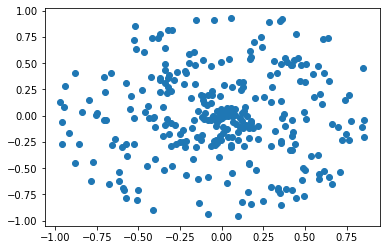

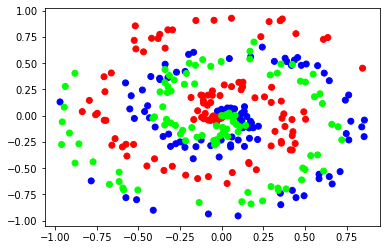

In [45]:
# ===== Create dataset =====

X, y = create_data(100, 3)
# Plot of the Dataset
plt.scatter(X[:,0], X[:,1])
plt.show()
# Plot with class separation
plt.scatter(X[:,0], X[:,1], c=y, cmap="brg")
plt.show()

In [46]:
# ===== Implement Neural Network =====
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3,3) # input should be same as output of previous layer i.e. 3, This layer also has 3 outputs
activation2 = Activation_Softmax()

# Running the Neural Net
dense1.forward(X)
activation1.forward(dense1.output) #ReLU
print("Output of ReLU Activation Funtion:", end="\n")
print(activation1.output[:5], end="\n\n\n") # Output of ReLU Activation Funtion

dense2.forward(activation1.output)
activation2.forward(dense2.output) #Softmax
print("Output of Softmax Activation Funtion:", end="\n")
print(activation2.output[:5], end="\n\n\n") # Output of Softmax Activation Funtion

Output of ReLU Activation Funtion:
[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.00101748 0.00298329 0.        ]
 [0.00069393 0.00244985 0.        ]
 [0.00141759 0.00448872 0.        ]]


Output of Softmax Activation Funtion:
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33354757 0.33328102 0.33317141]
 [0.33350431 0.33328813 0.33320757]
 [0.33365174 0.3332528  0.33309547]]


